In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import butter, sosfilt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib

In [6]:
# df = pd.read_csv('pms3003_data_sorted.csv')

In [7]:
import boto3
import pandas as pd

try:
    # Initialize DynamoDB client
    dynamodb = boto3.resource('dynamodb')

    # Assuming 'pms3003_data' is the name of your DynamoDB table
    table = dynamodb.Table('pms3003_data')

    # Perform the scan operation
    response = table.scan()

    # Retrieve items from the response
    items = response['Items']

    # Continue scanning if there are more items to retrieve
    while 'LastEvaluatedKey' in response:
        response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
        items.extend(response['Items'])

    # Convert the items to a DataFrame
    df = pd.DataFrame(items)

except Exception as e:
    print("Error:", e)

Error: Could not connect to the endpoint URL: "https://dynamodb.ap-southeast.amazonaws.com/"


In [4]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,pm1,pm25,pm10,station_number,timestamp
0,8,14,17,1,2024-04-02 22:43:35
1,8,14,17,1,2024-04-02 23:03:05
2,9,15,19,1,2024-04-02 23:03:37
3,8,14,18,1,2024-04-02 23:04:09
4,8,14,17,1,2024-04-02 23:04:41


In [ ]:
# Define a function to categorize PM2.5 levels
def categorize_pm25_level(pm25_value):
    if pm25_value <= 25:
        return 0
    elif pm25_value <= 50:
        return 1
    elif pm25_value <= 100:
        return 2
    elif pm25_value <= 200:
        return 3
    else:
        return 4

In [ ]:
# Apply the function to create a new column 'aqi_category'
df['aqi_category'] = df['pm25'].apply(categorize_pm25_level)

# Print the updated dataframe
print(df['aqi_category'])

0       0
1       0
2       0
3       0
4       0
       ..
5549    0
5550    0
5551    0
5552    0
5553    0
Name: aqi_category, Length: 5554, dtype: int64


In [ ]:
df.head()

,pm1,pm25,pm10,station_number,timestamp,aqi_category
0,8,14,17,1,2024-04-02 22:43:35,0
1,8,14,17,1,2024-04-02 23:03:05,0
2,9,15,19,1,2024-04-02 23:03:37,0
3,8,14,18,1,2024-04-02 23:04:09,0
4,8,14,17,1,2024-04-02 23:04:41,0


In [ ]:
# Exclude the 'timestamp' column from the input data
x = df.drop(["aqi_category", "station_number", "timestamp"], axis=1)
x.head()

,pm1,pm25,pm10
0,8,14,17
1,8,14,17
2,9,15,19
3,8,14,18
4,8,14,17


In [ ]:
y =df.aqi_category
y.head()

0    0
1    0
2    0
3    0
4    0
Name: aqi_category, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Train the model on the training data
gb_classifier.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = gb_classifier.predict(x_test)

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1141
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1667
   macro avg       1.00      1.00      1.00      1667
weighted avg       1.00      1.00      1.00      1667



In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(gb_classifier, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


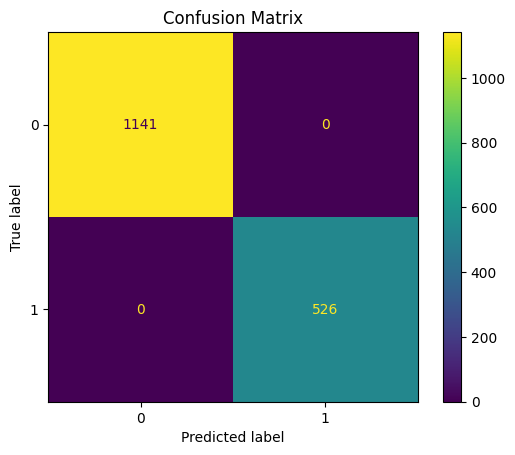

In [ ]:
# Assuming you already have model.predicted values
y_pred = gb_classifier.predict(x_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
joblib.dump(gb_classifier, 'gb_classifier_model_nontune.pkl')

['gb_classifier_model_nontune.pkl']